In [107]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Normalization, Dense, InputLayer
import matplotlib.pyplot as plt
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
import numpy as np

In [2]:
data = pd.read_csv("train.csv")
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [3]:
data.shape

(1000, 12)

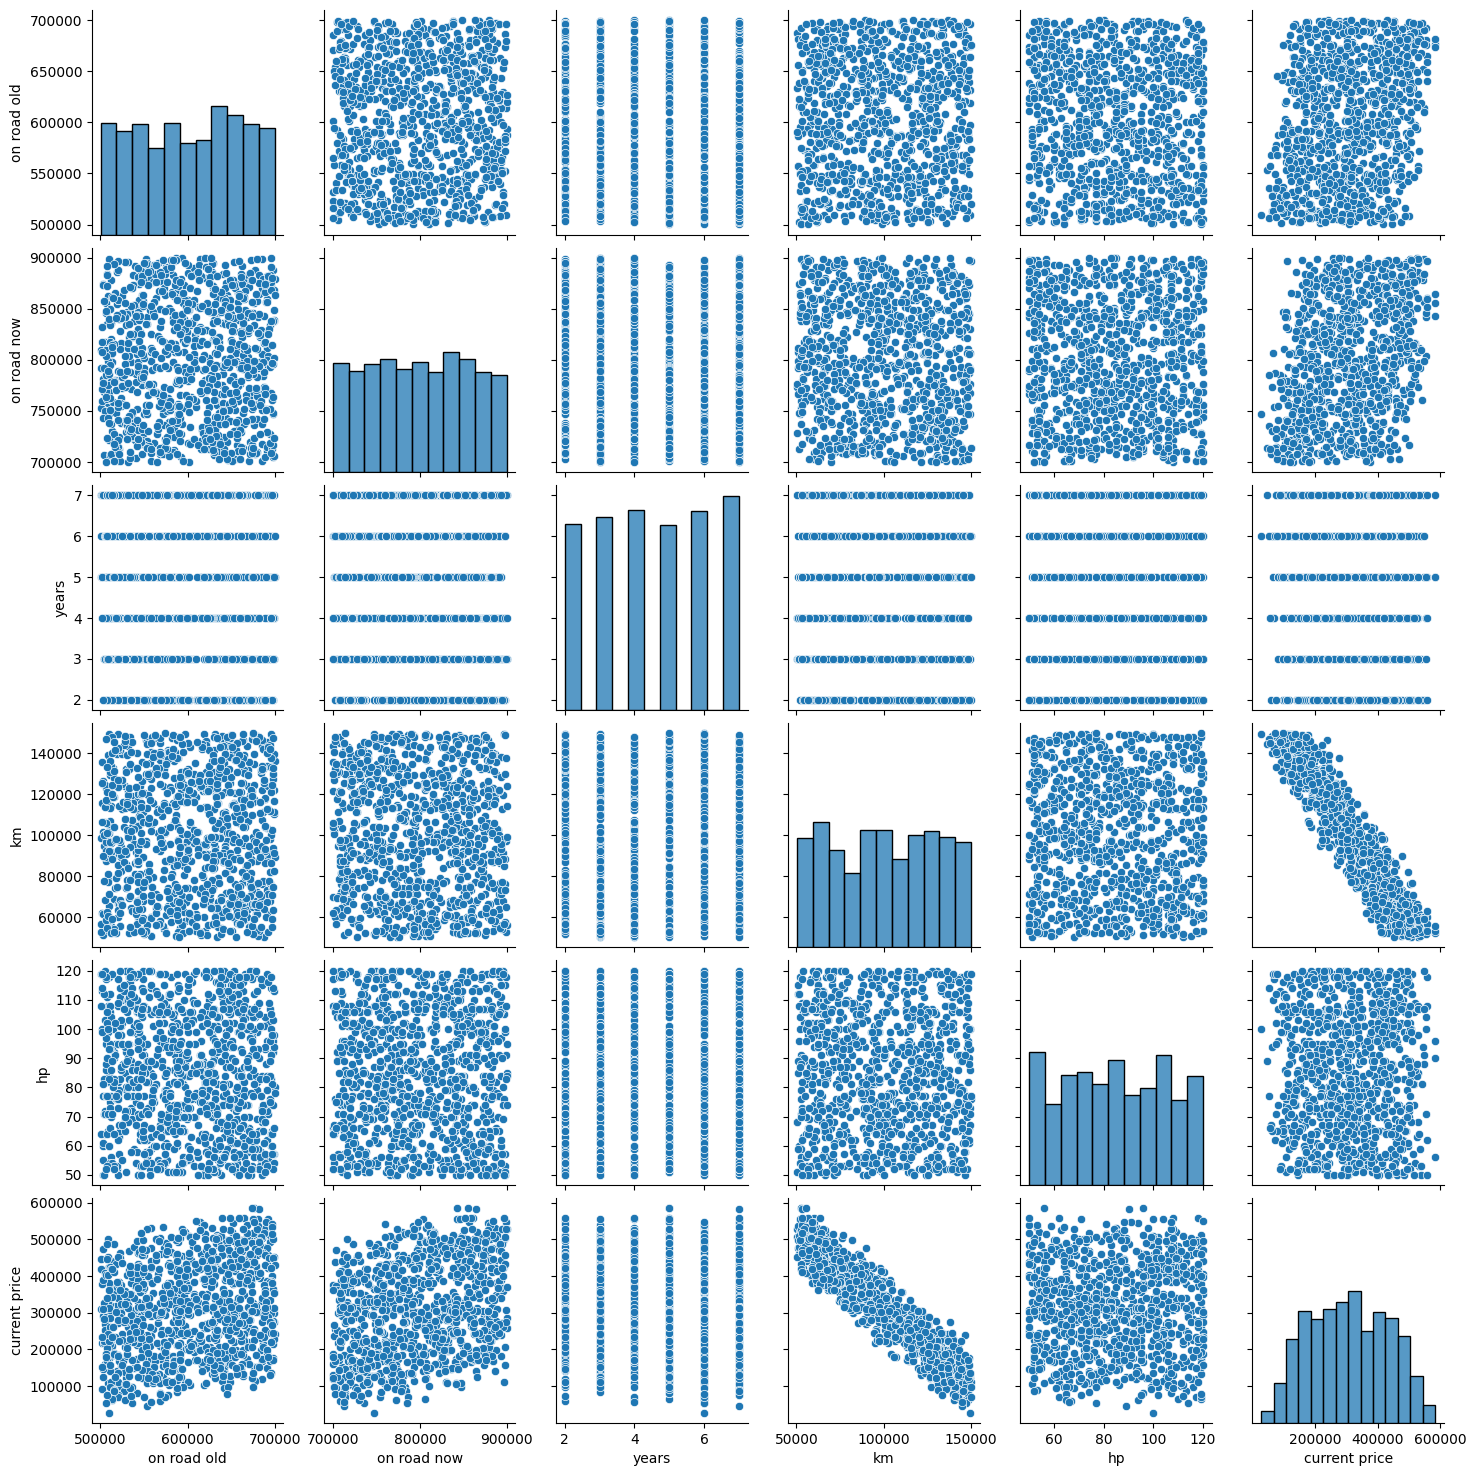

In [4]:
sns.pairplot(data[["on road old","on road now","years", "km", "hp", "current price"]])

In [5]:
tf_data = tf.constant(data)
tf_data = tf.cast(tf_data, tf.float32)
print(tf_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [6]:
tf_data = tf.random.shuffle(tf_data)
X = tf_data[:,3:-1] # Getting all rows of columns from 3 to total_column-1
y = tf_data[:,-1] # Getting the last column (Target column)
y = tf.expand_dims(y, axis=--1)

In [7]:
# Printing the first 5 data
print(X[:5])
print(y[:5])

tf.Tensor(
[[4.00000e+00 1.06715e+05 2.00000e+00 1.00000e+01 1.40000e+01 1.38000e+02
  5.90000e+01 7.10000e+01]
 [7.00000e+00 1.21144e+05 1.00000e+00 6.00000e+00 8.00000e+00 1.53000e+02
  1.18000e+02 1.17000e+02]
 [5.00000e+00 1.29991e+05 3.00000e+00 4.00000e+00 1.40000e+01 1.68000e+02
  7.10000e+01 7.70000e+01]
 [2.00000e+00 1.46254e+05 3.00000e+00 5.00000e+00 8.00000e+00 1.51000e+02
  7.40000e+01 7.70000e+01]
 [2.00000e+00 1.38175e+05 1.00000e+00 5.00000e+00 1.00000e+01 1.93000e+02
  9.30000e+01 1.00000e+02]], shape=(5, 8), dtype=float32)
tf.Tensor(
[[319728. ]
 [272075. ]
 [122139.5]
 [107500.5]
 [153375.5]], shape=(5, 1), dtype=float32)


# Splitting The Dataset

In [48]:
TRAIN_RATIO = 0.75
VALIDATION_RATIO = 0.10
TEST_RATIO = 0.15
DATASET_SIZE = len(X)

### Splitting for training data

In [57]:
X_train = X[:int(DATASET_SIZE * TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE * TRAIN_RATIO)]
print(X_train.shape)
print(y_train.shape)

(750, 8)
(750, 1)


### Splitting for validation data

In [59]:
X_val = X[int(DATASET_SIZE * TRAIN_RATIO) : int(DATASET_SIZE * (VALIDATION_RATIO+TRAIN_RATIO))]
y_val = y[int(DATASET_SIZE * TRAIN_RATIO) : int(DATASET_SIZE * (VALIDATION_RATIO+TRAIN_RATIO))]
print(X_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


### Splitting for test data

In [60]:
X_test = X[int(DATASET_SIZE * (VALIDATION_RATIO+TRAIN_RATIO)) :]
y_test = y[int(DATASET_SIZE * (VALIDATION_RATIO+TRAIN_RATIO)) :]
print(X_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [8]:
my_normalizer = Normalization()
my_normalizer.adapt(X)
my_normalizer(X)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[-0.32650068,  0.22105312, -0.7046622 ,  1.5614392 ,  1.065293  ,
        -1.4986984 , -1.2457403 , -1.5404178 ],
       [ 1.4194926 ,  0.71628433, -1.4178832 ,  0.14452522, -1.6259733 ,
        -0.72063893,  1.631371  ,  0.64504397],
       [ 0.2554971 ,  1.0199305 ,  0.00855871, -0.56393176,  1.065293  ,
         0.05742051, -0.66056514, -1.2553576 ],
       [-1.4904962 ,  1.5781082 ,  0.00855871, -0.20970327, -1.6259733 ,
        -0.8243802 , -0.5142713 , -1.2553576 ],
       [-1.4904962 ,  1.3008213 , -1.4178832 , -0.20970327, -0.72888464,
         1.3541863 ,  0.41225603, -0.1626267 ]], dtype=float32)>

In [122]:
model = tf.keras.Sequential()
model.add(InputLayer(shape=(8,)))
model.add(my_normalizer)
model.add(Dense(128, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(1))
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 8)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,322 (134.07 KB)

 Trainable params: 34,305 (134.00 KB)

 Non-trainable params: 17 (72.00 B)

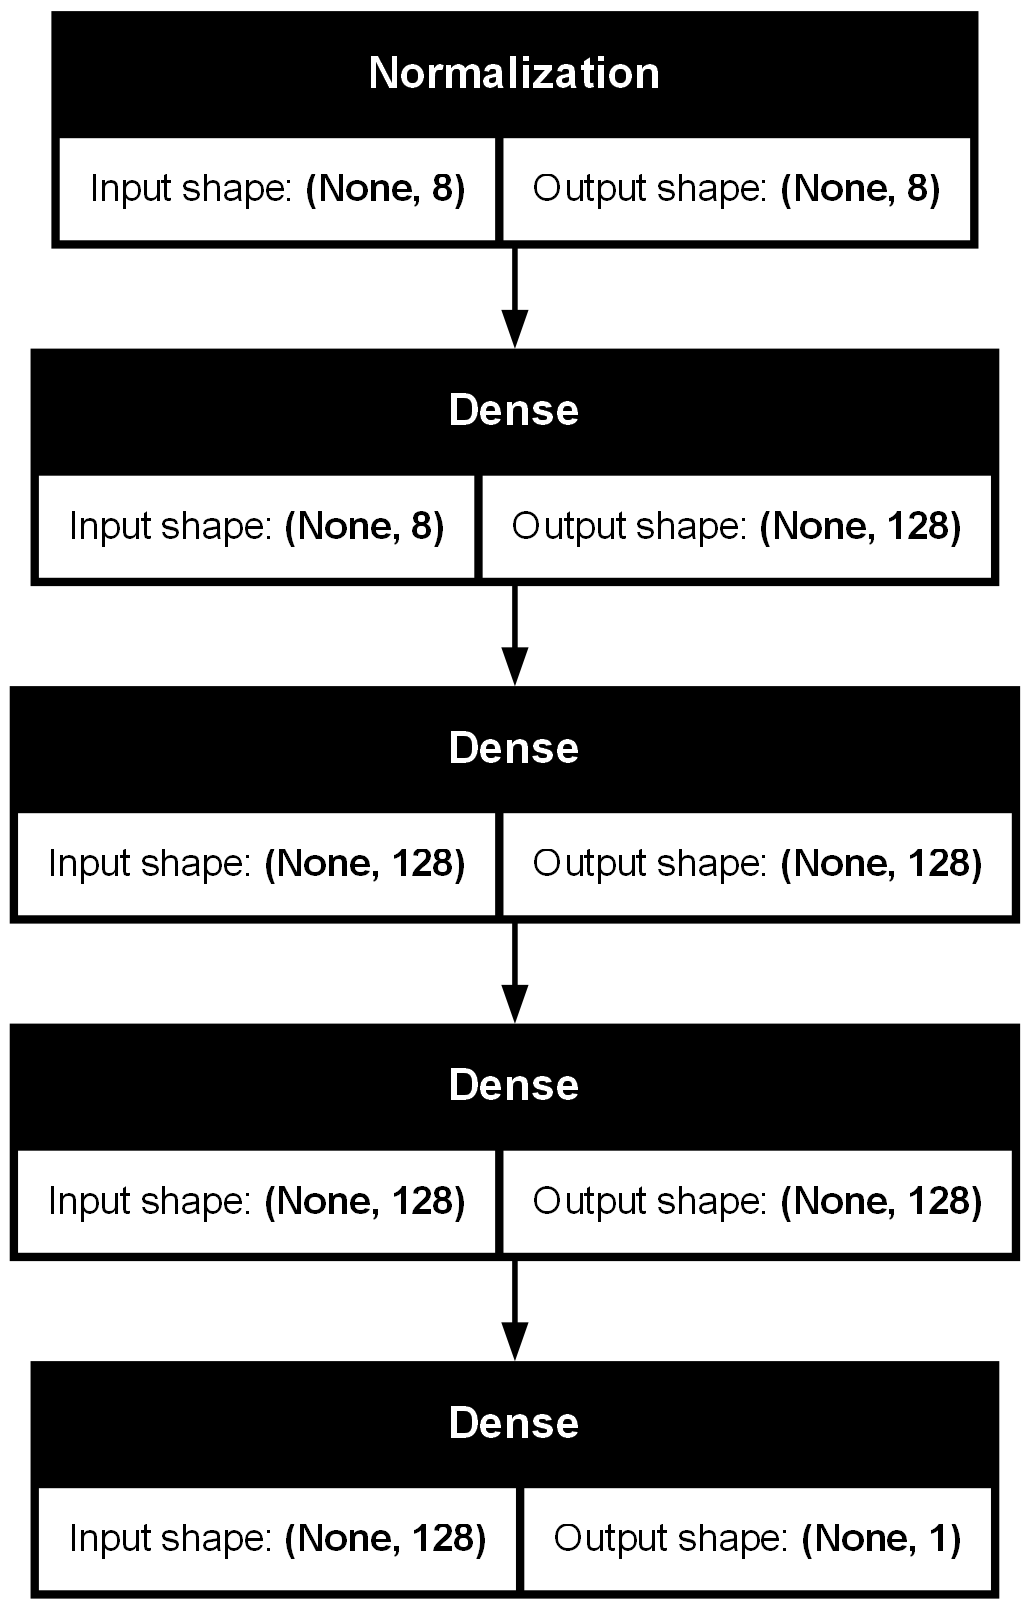

In [123]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

In [124]:
model.compile(optimizer = Adam(learning_rate= 0.1), 
              loss = MeanAbsoluteError())

In [125]:
built_model_1 = model.fit(X_train, y_train,
                          validation_data = (X_val, y_val),
                          epochs=100, 
                          verbose=1)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 229286.1094 - val_loss: 62718.3047
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 58858.7969 - val_loss: 53761.3086
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 52142.5117 - val_loss: 50943.5703
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 45606.7617 - val_loss: 40066.3594
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 41015.4297 - val_loss: 38137.7383
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 38815.2227 - val_loss: 37413.2383
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 41533.1445 - val_loss: 41945.0781
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 44184.6641 - val_loss: 43006.0391
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 41103.5508 - val_loss: 40547.4258
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 40472.1484 - val_loss: 36173.2266
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 38727.0

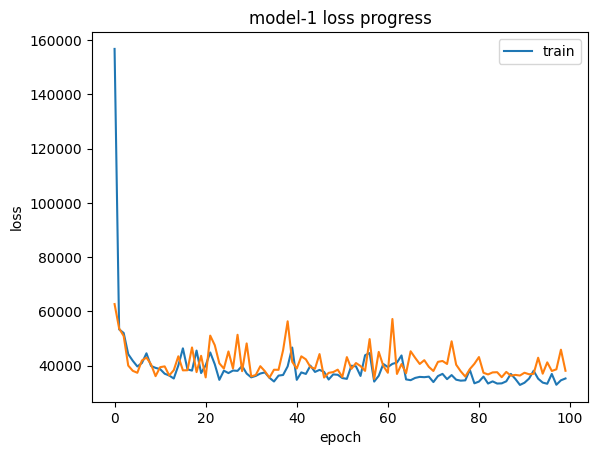

In [131]:
plt.plot(built_model_1.history['loss'])
plt.plot(built_model_1.history['val_loss'])
plt.title('model-1 loss progress')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'])
plt.show()

In [132]:
model.evaluate(X_test,y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 37578.7227


39286.80859375

In [133]:
y_true = list(y_test[:,0].numpy())
y_pred = list(model.predict(X_test)[:,0])
print(y_pred[:5])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[np.float32(374682.47), np.float32(472749.44), np.float32(391411.44), np.float32(493475.56), np.float32(131528.5)]


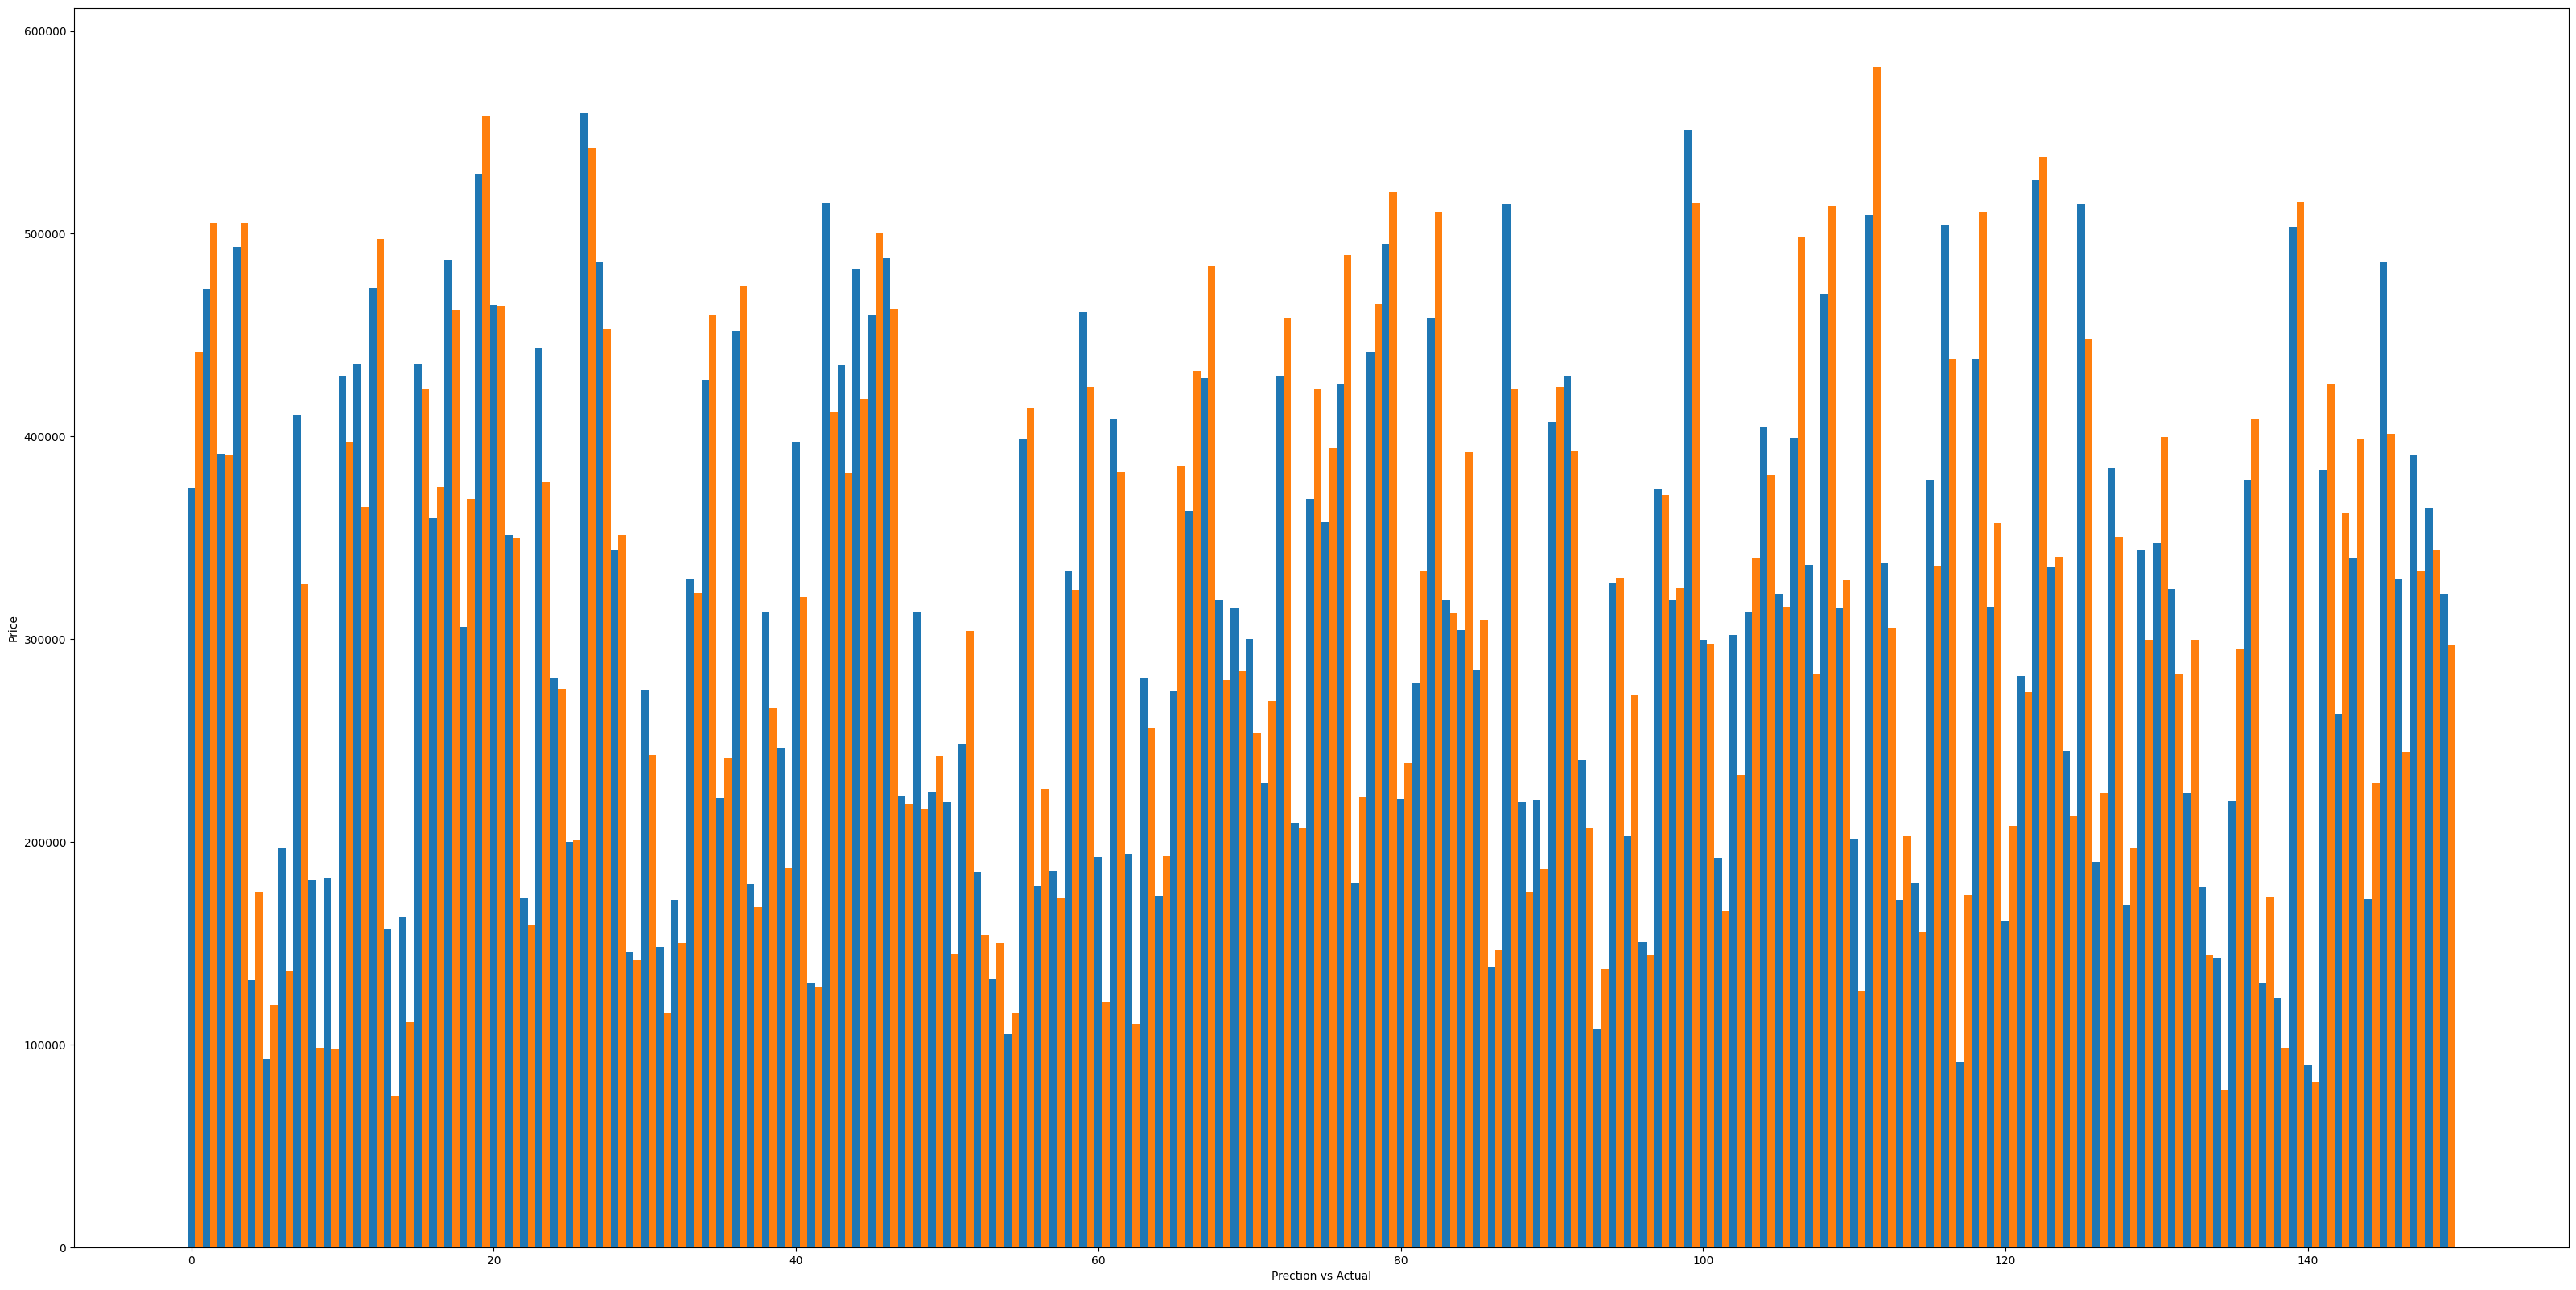

In [134]:
index = np.arange(DATASET_SIZE*TEST_RATIO)
plt.figure(figsize=(40,20))
width = 0.5
plt.bar(index, y_pred, width, label="Car Price (Predicted)")
plt.bar(index+width, y_true, width, label="Actual Car Price")
plt.xlabel("Prection vs Actual")
plt.ylabel("Price")
plt.show()

In [1]:
print("HELLO")

HELLO


In [5]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[]
